<a href="https://colab.research.google.com/github/haseeb1zahid/Machine-Learning-Projects/blob/master/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing

In [0]:
df = pd.read_csv("/tmp/lrtest.data")

In [0]:
df.groupby('label').mean()

,gre_score,gpa,school_ranking
label,,,
0,573.186813,3.343700,2.641026
1,618.897638,3.489213,2.149606


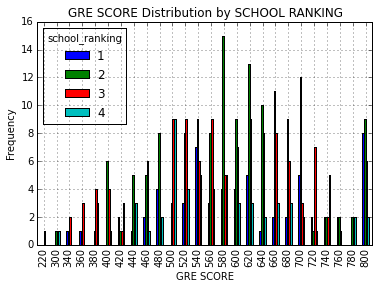

In [0]:
%matplotlib inline
pd.crosstab(df.gre_score, df.school_ranking).plot(kind='bar')
plt.title('GRE SCORE Distribution by SCHOOL RANKING')
plt.xlabel('GRE SCORE')
plt.ylabel('Frequency')

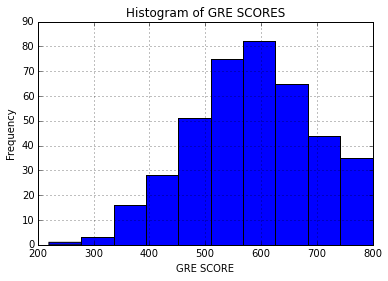

In [0]:
# histogram of GRE
df.gre_score.hist()
plt.title('Histogram of GRE SCORES')
plt.xlabel('GRE SCORE')
plt.ylabel('Frequency')

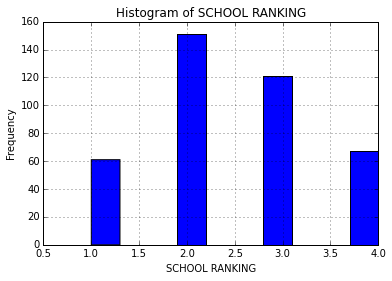

In [0]:
# histogram of SCHOOL RANKING
df.school_ranking.hist()
plt.title('Histogram of SCHOOL RANKING')
plt.xlabel('SCHOOL RANKING')
plt.ylabel('Frequency')

In [0]:
# Run Logistic Regression
y, X = dmatrices('label ~ gre_score + gpa + school_ranking',
                  df, return_type="dataframe")
print X.columns


Index([u'Intercept', u'gre_score', u'gpa', u'school_ranking'], dtype='object')


In [0]:
# flatten y into a 1-D array
y = np.ravel(y)

In [0]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.70750000000000002

In [0]:
# what percentage were admitted?
y.mean()

0.3175

In [0]:
# Only 31.75% were admitted, so the null error rate is 68.25%
# i.e, we get a 68.25% accuracy by simply predicting everyone in the training set to be not admitted.

# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-1.02765139068]
1,gre_score,[0.00203746737217]
2,gpa,[0.437414476233]
3,school_ranking,[-0.586442268855]


In [0]:
# evaluate the model by splitting into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_scaled = preprocessing.scale(X)
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [0]:
# predict class labels for the test set
predicted = model.predict(X_test)

# generate class probabilities
probs = model.predict_proba(X_test)

# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.641666666667
0.750218595162


In [0]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.73170732  0.75609756  0.58536585  0.675       0.65        0.75        0.725
  0.69230769  0.66666667  0.74358974]
0.697573483427
